# DBSCAN

## Introduction

In this Jupyter notebook, we will get into Density-based spatial clustering of applications with noise method(DBSCAN).It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

## Datasets

We will use "make_blobs" dataset in this case. make_blobs is a function for producing multi-dimensional datasets with a specified number of samples, features, and cluster centers. Here's a detailed description of function:
- n_samples: Total number of points equally divided among clusters. It can be an integer or an array of integers for different numbers of samples per cluster.
- n_features: Number of features for each sample.
- centers: Number of centers to generate, or the fixed center locations. If an integer is given, it generates that number of centers. If an array is provided, centers are placed at the points specified.
- cluster_std: Standard deviation of the clusters.
- random_state: Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.




We will employ the "make_blobs" dataset to explore how the algorithm can effectively identify and delineate non-linear clusters within complex data distributions. This dataset provides an excellent opportunity to showcase DBSCAN's strengths in clustering and noise detection.

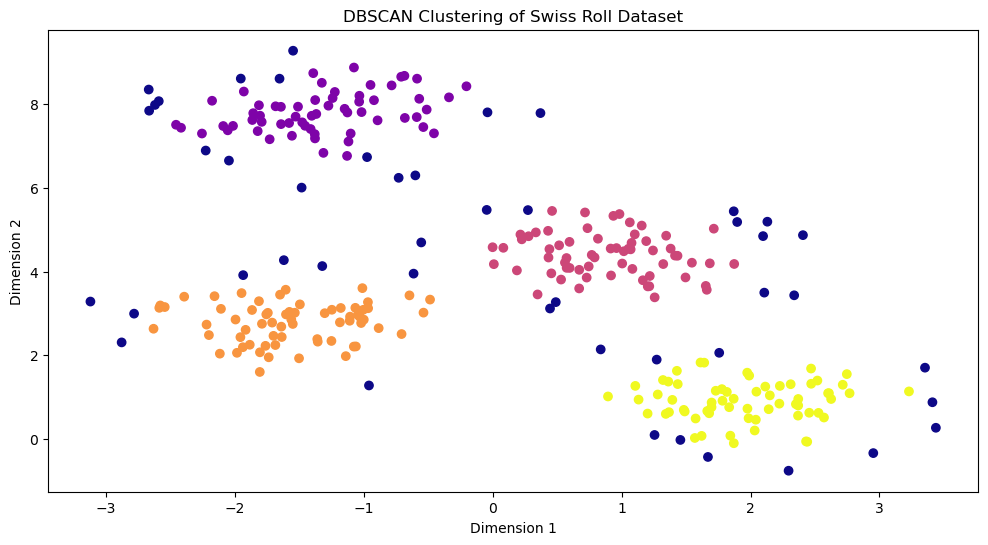

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generating a complex synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=10)

# Fit and predict the labels
y_pred = db.fit_predict(X)

# Plotting the cluster assignments
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
plt.title('DBSCAN Clustering of Swiss Roll Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Define different combinations of eps and min_samples for DBSCAN

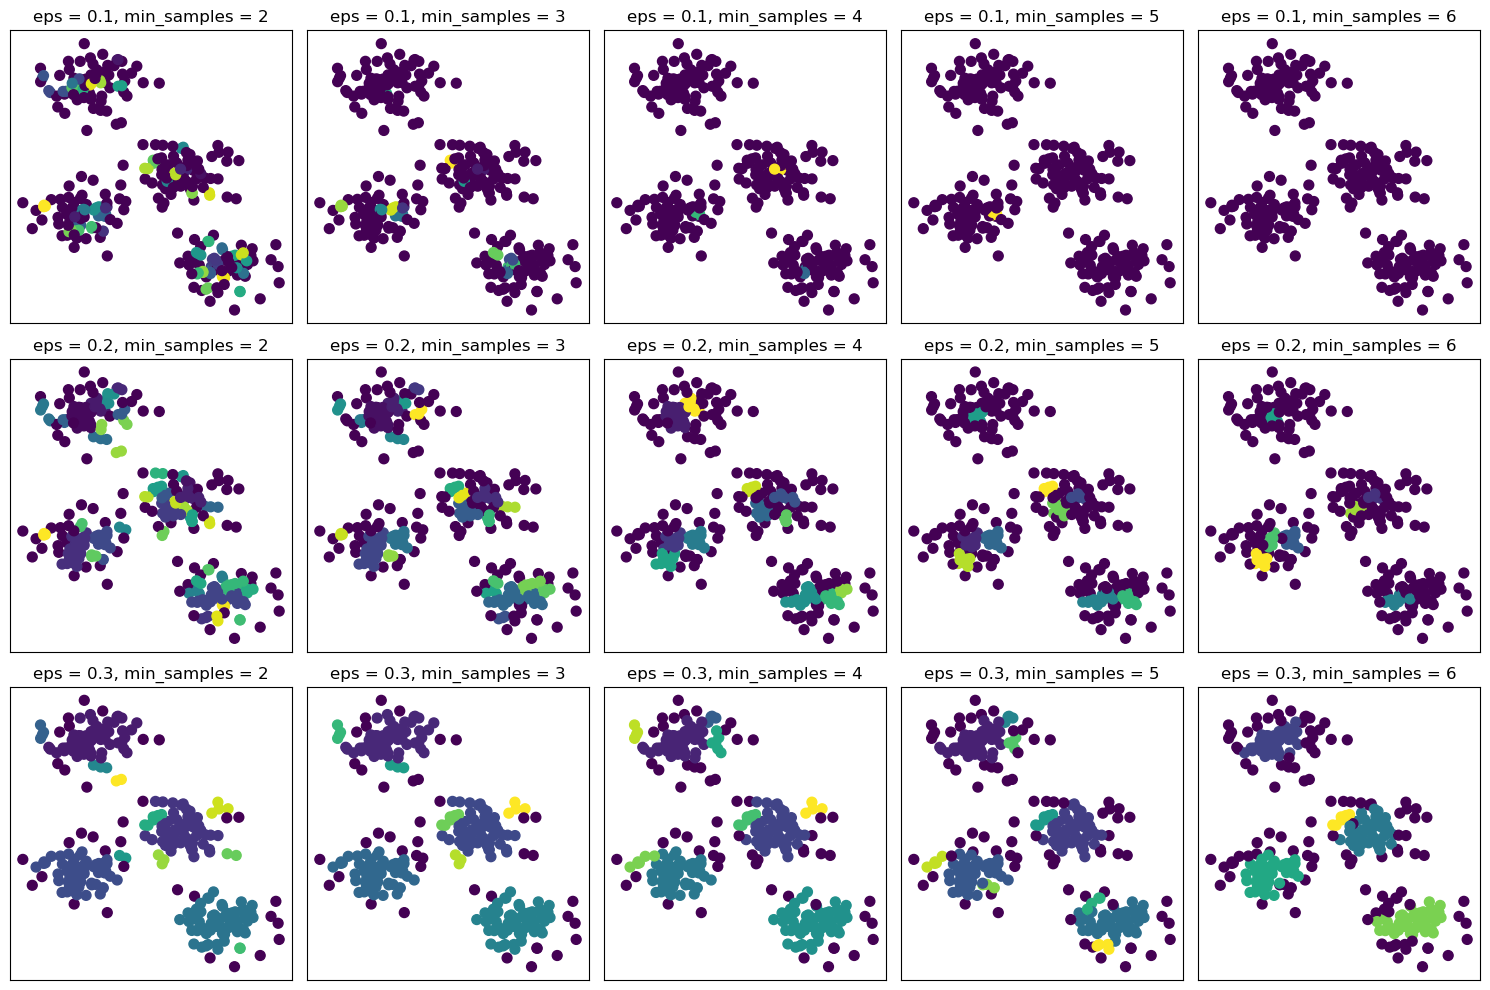

In [3]:
# Define different combinations of eps and min_samples for DBSCAN
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [2, 3, 4, 5, 6]

# Create subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Iterate over all combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(X)

        # Plot the results
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        axes[i, j].set_title(f'eps = {eps}, min_samples = {min_samples}')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The series of plots generated from the DBSCAN algorithm on the Swiss roll dataset, with varying eps (epsilon) and min_samples values, offer insightful visualizations into how these parameters influence clustering results:

## Epsilon (eps) Variations:

- Lower eps (0.1): The clusters are very fragmented. A small eps value leads to many data points being considered as noise (outliers) because they don't have enough neighbors within this small radius.
- Medium eps (0.2): Clusters start to form more cohesively compared to lower eps, but there's still a notable amount of noise. This setting begins to balance between distinguishing separate clusters and identifying outliers.
- Higher eps (0.3): With an increased eps, the clusters become larger and more connected. However, this also risks merging distinct clusters into a single one if the eps is too large, potentially oversimplifying the dataset's structure.

## Minimum Samples (min_samples) Variations:
- Lower min_samples (2, 3): Fewer points are needed to form a cluster, leading to more clusters being identified. This can be beneficial in a densely packed dataset but may result in over-clustering in sparse datasets.
- Higher min_samples (4, 5, 6): Increasing min_samples generally results in fewer, more significant clusters. It demands more points to form a cluster, thus reducing sensitivity to noise. However, setting it too high might miss smaller, yet potentially meaningful clusters.

## Insights and Practical Implications:
- Choosing eps and min_samples depends on the specific dataset characteristics and the clustering objectives. Fine-tuning these parameters is crucial for meaningful clustering results.
- Noise Identification: DBSCAN effectively identifies outliers, which is useful in anomaly detection.
- Cluster Shape and Size: DBSCAN does not assume spherical clusters (like K-means) and can thus identify clusters of arbitrary shapes and sizes, as evident in the Swiss roll dataset.
- Parameter Sensitivity: The plots underscore DBSCAN's sensitivity to its parameters, emphasizing the need for careful parameter selection based on the dataset's specific nature.




# Conclusion
In conclusion, we delved into the robustness and adaptability of the DBSCAN algorithm for unsupervised clustering tasks. DBSCAN has proven to be a crucial tool for identifying clusters with diverse shapes and sizes across datasets, rendering it highly effective for numerous practical applications.

By experimenting with different settings for the eps (epsilon) and min_samples parameters during visualizations, we developed a deeper understanding of how these parameters impact clustering outcomes, underscoring the necessity of meticulous parameter tuning. The capability of DBSCAN to detect noise, manage non-homogeneous data distributions, and conform to intricate cluster configurations enhances its value as a significant tool in a data scientist's arsenal.